In [2]:
%matplotlib inline

import matplotlib.pyplot as plt
import os
import numpy as np
import pandas as pd
import seaborn as sns

In [7]:
sns.set_style("ticks")
sns.set_context("paper",font_scale=2.0)
sns.set_style({"xtick.direction": "in","ytick.direction": "in"})

import matplotlib
import matplotlib.pyplot as plt
font = {'family': 'serif', 'serif': ['Gentium Basic'], 'size': 10}
plt.rc('font', **font)
matplotlib.rcParams['mathtext.fontset'] = 'custom'
matplotlib.rcParams['mathtext.rm'] = 'Gentium Basic'
matplotlib.rcParams['mathtext.it'] = 'Gentium Basic:italic'
matplotlib.rcParams['mathtext.bf'] = 'Gentium Basic:bold'

from matplotlib.backends.backend_pgf import FigureCanvasPgf
matplotlib.backend_bases.register_backend('pdf', FigureCanvasPgf)

pgf_with_custom_preamble = {
"font.family": "serif", # use serif/main font for text elements
"text.usetex": False,    # use inline math for ticks
"pgf.preamble": [
    "\\usepackage{mathpazo}",
    "\\usepackage{gentium}",
    "\\DeclareSymbolFont{sfnumbers}{T1}{gentium}{m}{n}",
    "\\SetSymbolFont{sfnumbers}{bold}{T1}{gentium}{bx}{n}",
    "\\DeclareMathSymbol{0}\mathalpha{sfnumbers}{\"30}",
    "\\DeclareMathSymbol{1}\mathalpha{sfnumbers}{\"31}",
    "\\DeclareMathSymbol{2}\mathalpha{sfnumbers}{\"32}",
    "\\DeclareMathSymbol{3}\mathalpha{sfnumbers}{\"33}",
    "\\DeclareMathSymbol{4}\mathalpha{sfnumbers}{\"34}",
    "\\DeclareMathSymbol{5}\mathalpha{sfnumbers}{\"35}",
    "\\DeclareMathSymbol{6}\mathalpha{sfnumbers}{\"36}",
    "\\DeclareMathSymbol{7}\mathalpha{sfnumbers}{\"37}",
    "\\DeclareMathSymbol{8}\mathalpha{sfnumbers}{\"38}",
    "\\DeclareMathSymbol{9}\mathalpha{sfnumbers}{\"39}",
    "\\DeclareMathSymbol{,}\mathalpha{sfnumbers}{\"2C}"
    ]
}
matplotlib.rcParams.update(pgf_with_custom_preamble)

/home/sbg/anaconda3/lib/python3.8/_collections_abc.py:832: MatplotlibDeprecationWarning: Support for setting the 'text.latex.preamble' or 'pgf.preamble' rcParam to a list of strings is deprecated since 3.3 and will be removed two minor releases later; set it to a single string instead.
  self[key] = other[key]


In [3]:
dir = '../data/'
dat = pd.read_csv(dir + 'US_States/OxCGRT_latest.csv')
dat['Date_clean'] = pd.to_datetime(dat['Date'].astype(str))
#dat = dat.loc[dat['Date_clean'] >= '03/01/2020']
print(dat)

       CountryName CountryCode RegionName RegionCode Jurisdiction      Date  \
0            Aruba         ABW        NaN        NaN    NAT_TOTAL  20200101   
1            Aruba         ABW        NaN        NaN    NAT_TOTAL  20200102   
2            Aruba         ABW        NaN        NaN    NAT_TOTAL  20200103   
3            Aruba         ABW        NaN        NaN    NAT_TOTAL  20200104   
4            Aruba         ABW        NaN        NaN    NAT_TOTAL  20200105   
...            ...         ...        ...        ...          ...       ...   
119982    Zimbabwe         ZWE        NaN        NaN    NAT_TOTAL  20210226   
119983    Zimbabwe         ZWE        NaN        NaN    NAT_TOTAL  20210227   
119984    Zimbabwe         ZWE        NaN        NaN    NAT_TOTAL  20210228   
119985    Zimbabwe         ZWE        NaN        NaN    NAT_TOTAL  20210301   
119986    Zimbabwe         ZWE        NaN        NaN    NAT_TOTAL  20210302   

        C1_School closing  C1_Flag  C2_Workplace cl

/home/sbg/anaconda3/lib/python3.8/site-packages/IPython/core/interactiveshell.py:3146: DtypeWarning: Columns (2,3) have mixed types.Specify dtype option on import or set low_memory=False.
  has_raised = await self.run_ast_nodes(code_ast.body, cell_name,


In [4]:
us_dat = dat.loc[dat['CountryName']=='United States']
us_dat = us_dat.loc[us_dat['Jurisdiction'] == 'STATE_TOTAL']
print(us_dat['RegionName'].value_counts(dropna=False))
print(us_dat.columns)

Nevada            427
Arkansas          427
South Carolina    427
Hawaii            427
Oklahoma          427
Vermont           427
Wyoming           427
Washington DC     427
North Carolina    427
Arizona           427
New Mexico        427
North Dakota      427
Illinois          427
Georgia           427
Washington        427
Iowa              427
Texas             427
Utah              427
Idaho             427
New Jersey        427
Michigan          427
Connecticut       427
Louisiana         427
New York          427
Oregon            427
Pennsylvania      427
Colorado          427
California        427
Delaware          427
Florida           427
Rhode Island      427
Virginia          427
Montana           427
West Virginia     427
Nebraska          427
Minnesota         427
Mississippi       427
Indiana           427
Maryland          427
Alaska            427
South Dakota      427
Missouri          427
Ohio              427
New Hampshire     427
Alabama           427
Maine     

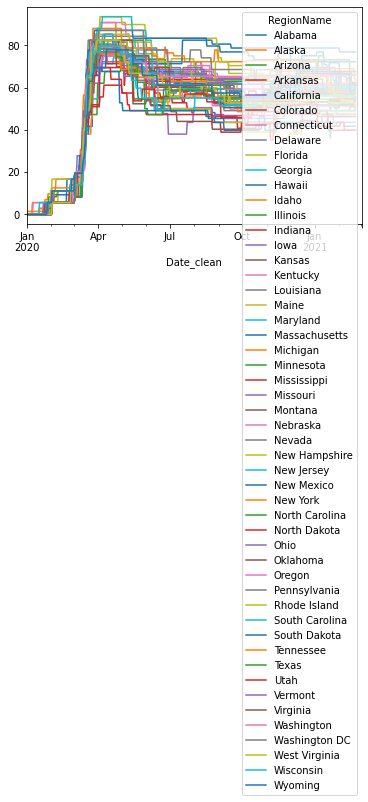

In [5]:
us_dat.groupby(['Date_clean', 'RegionName'])['StringencyIndex'].mean().unstack().plot()
plt.show()

In [11]:
from collections.abc import Iterable
from sklearn import linear_model

class AxTransformer:
    def __init__(self, datetime_vals=False):
        self.datetime_vals = datetime_vals
        self.lr = linear_model.LinearRegression()
        
        return
    
    def process_tick_vals(self, tick_vals):
        if not isinstance(tick_vals, Iterable) or isinstance(tick_vals, str):
            tick_vals = [tick_vals]
            
        if self.datetime_vals == True:
            tick_vals = pd.to_datetime(tick_vals).astype(int).values
            
        tick_vals = np.array(tick_vals)
            
        return tick_vals
    
    def fit(self, ax, axis='x'):
        axis = getattr(ax, f'get_{axis}axis')()
        
        tick_locs = axis.get_ticklocs()
        tick_vals = self.process_tick_vals([label._text for label in axis.get_ticklabels()])
        
        self.lr.fit(tick_vals.reshape(-1, 1), tick_locs)
        
        return
    
    def transform(self, tick_vals):        
        tick_vals = self.process_tick_vals(tick_vals)
        tick_locs = self.lr.predict(np.array(tick_vals).reshape(-1, 1))
        
        return tick_locs
    
def set_date_ticks(ax, start_date, end_date, axis='y', date_format='%Y-%m-%d', **date_range_kwargs):
    dt_rng = pd.date_range(start_date, end_date, **date_range_kwargs)

    ax_transformer = AxTransformer(datetime_vals=True)
    ax_transformer.fit(ax, axis=axis)
    
    getattr(ax, f'set_{axis}ticks')(ax_transformer.transform(dt_rng))
    getattr(ax, f'set_{axis}ticklabels')(dt_rng.strftime(date_format))

    ax.tick_params(axis=axis, which='both', bottom=True, top=False, labelbottom=True)
    
    return ax

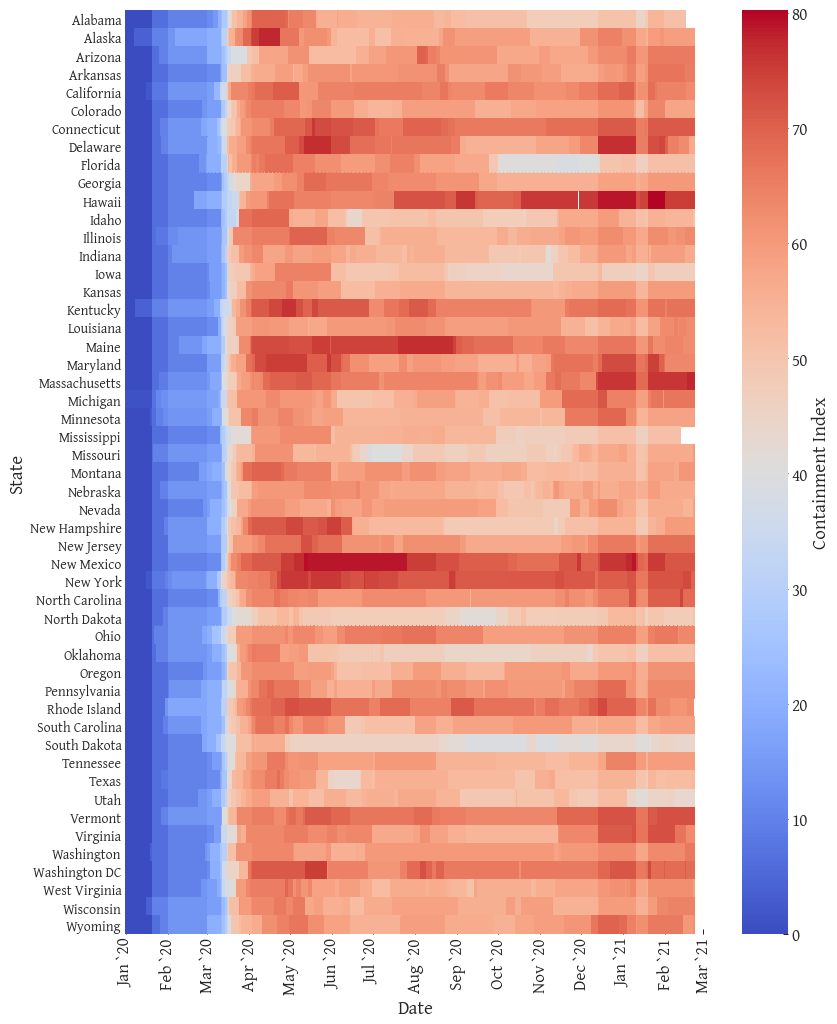

In [14]:
### READY FOR FINAL PLOT @SHERIDAN

# fig,ax = plt.subplots(figsize=(10, 15))
# sns.heatmap(us_dat.groupby(['RegionName', 'Date_clean'])['ContainmentHealthIndex'].mean().unstack(), 
#             vmin=0, vmax=100, cmap='coolwarm', ax=ax)

us_dat['strdate'] = us_dat['Date_clean'].astype(str)

fig,ax = plt.subplots(figsize=(13, 17))
sns.heatmap(us_dat.groupby(['RegionName', 'strdate'])['ContainmentHealthIndex'].mean().unstack(), 
            vmin=0, vmax=us_dat['ContainmentHealthIndex'].max(), cmap='coolwarm', ax=ax, cbar_kws={'label': r'Containment Index'})
ax.set_yticklabels(ax.get_yticklabels(), fontsize=14)

set_date_ticks(ax, '2020-01-01', '2021-03-01', freq='1MS', axis='x', date_format='%b `%y')

ax.set_ylabel('State')
ax.set_xlabel('Date')
plt.savefig('../figures/containment_by_state.eps', bbox_inches='tight')

In [ ]:
country_dat = dat.loc[dat['Jurisdiction']=='NAT_TOTAL']
print(country_dat['CountryName'].value_counts())

Poland        427
Jamaica       427
Comoros       427
Uganda        427
Malaysia      427
             ... 
Mauritius     427
Azerbaijan    427
Greece        427
Latvia        427
Cambodia      427
Name: CountryName, Length: 186, dtype: int64


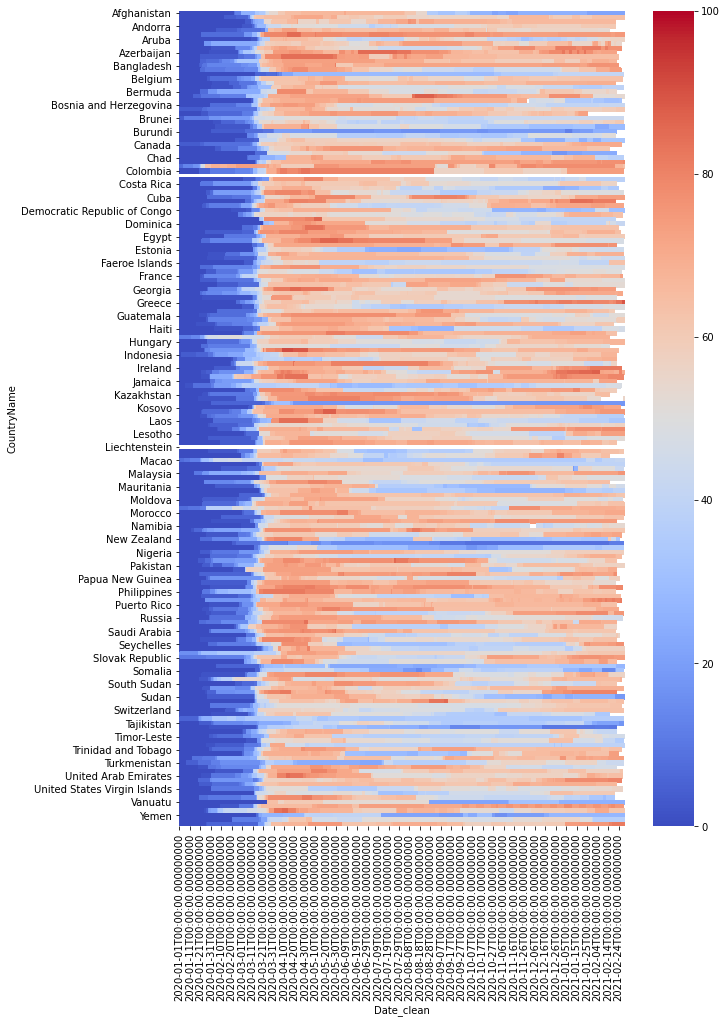

In [ ]:
fig,ax = plt.subplots(figsize=(10, 15))
sns.heatmap(country_dat.groupby(['CountryName', 'Date_clean'])['ContainmentHealthIndex'].mean().unstack(), 
            vmin=0, vmax=100, cmap='coolwarm', ax=ax)
plt.show()

In [ ]:
us_dat['Date'] = us_dat['Date_clean'].astype(str)
us_dat['statename'] = us_dat['RegionName']
us_dat.loc[us_dat['statename']=='Washington DC', 'statename'] = 'District of Columbia'

us_trim = us_dat[['statename', 'Date', 'StringencyIndex', 'ContainmentHealthIndex']]
print(us_trim['statename'].value_counts(dropna=False))
print(us_trim.groupby('statename')[['StringencyIndex', 'ContainmentHealthIndex']].agg(lambda x: x.isnull().sum()))

geo_xwalk = pd.read_csv(dir + 'US_States/TrackTheRecovery/GeoIDs - State.csv')
geo_xwalk = geo_xwalk[['statefips', 'statename', 'stateabbrev']]
print(geo_xwalk)
us_trim = us_trim.merge(geo_xwalk, on='statename', how='left', indicator='match')
print(us_trim['match'].value_counts())
print(us_trim.columns)

Delaware                427
South Carolina          427
New Hampshire           427
Nebraska                427
Kansas                  427
North Dakota            427
New Mexico              427
Georgia                 427
North Carolina          427
Wyoming                 427
Missouri                427
Washington              427
Montana                 427
Arizona                 427
Michigan                427
Maryland                427
Texas                   427
Florida                 427
Rhode Island            427
Minnesota               427
New Jersey              427
Connecticut             427
Maine                   427
Tennessee               427
Louisiana               427
Kentucky                427
New York                427
Massachusetts           427
Illinois                427
West Virginia           427
Idaho                   427
Nevada                  427
Wisconsin               427
Alabama                 427
Vermont                 427
Iowa                

In [ ]:
shadow_dat = pd.read_csv(dir + 'US_States/cleaned_data/mobility_pca_only.csv')
m = us_trim.merge(shadow_dat, on=['Date', 'statefips', 'statename'], how='outer', indicator='_merge')
print(m['_merge'].value_counts())
# Looks like we are just losing stuff before 2/1/20 (which is our begin cutoff) and after 2/26/21
print(m.loc[m['_merge']=='left_only', 'Date'].value_counts().sort_index())
m = m.loc[m['_merge']=='both']
m = m[['statename', 'Date', 'StringencyIndex', 'ContainmentHealthIndex',
       'statefips', 'stateabbrev', 'shadow_index_normalized']]
print(m.columns)
m.to_csv(dir + 'US_States/cleaned_data/mobility_and_stringency.csv')


# plt.figure()
# fl = m.loc[m['statename']=='Florida']
# plt.plot(pd.to_datetime(fl['Date']), fl[['ContainmentHealthIndex', 'shadow_index_normalized']])
# plt.ylim(0,100)
# plt.title('Florida')

# plt.figure()
# ca = m.loc[m['statename']=='California']
# plt.plot(pd.to_datetime(ca['Date']), ca[['ContainmentHealthIndex', 'shadow_index_normalized']])
# plt.ylim(0,100)
# plt.title('California')

# plt.figure()
# sd = m.loc[m['statename']=='South Dakota']
# plt.plot(pd.to_datetime(sd['Date']), sd[['ContainmentHealthIndex', 'shadow_index_normalized']])
# plt.ylim(0,100)
# plt.title('South Dakota')

# m['adherence_ratio'] = m['shadow_index_normalized'] / m['ContainmentHealthIndex']
# fig,ax = plt.subplots(figsize=(10, 15))
# sns.heatmap(m.groupby(['statename', 'Date'])['adherence_ratio'].mean().unstack(), 
#             cmap='viridis', ax=ax)



both          19941
left_only      1836
right_only        0
Name: _merge, dtype: int64
2020-01-01    51
2020-01-02    51
2020-01-03    51
2020-01-04    51
2020-01-05    51
2020-01-06    51
2020-01-07    51
2020-01-08    51
2020-01-09    51
2020-01-10    51
2020-01-11    51
2020-01-12    51
2020-01-13    51
2020-01-14    51
2020-01-15    51
2020-01-16    51
2020-01-17    51
2020-01-18    51
2020-01-19    51
2020-01-20    51
2020-01-21    51
2020-01-22    51
2020-01-23    51
2020-01-24    51
2020-01-25    51
2020-01-26    51
2020-01-27    51
2020-01-28    51
2020-01-29    51
2020-01-30    51
2020-01-31    51
2021-02-26    51
2021-02-27    51
2021-02-28    51
2021-03-01    51
2021-03-02    51
Name: Date, dtype: int64
Index(['statename', 'Date', 'StringencyIndex', 'ContainmentHealthIndex',
       'statefips', 'stateabbrev', 'shadow_index_normalized'],
      dtype='object')
